## file Load

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt
import json
# 지도 매핑
import folium
# 한글깨짐 해결
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (14,4)
# 마이너스 깨짐 해결
mpl.rcParams['axes.unicode_minus'] = False

# station

In [3]:
stations_table = pd.read_csv("./PJT001_stations_table.csv")

In [4]:
stations_table.head()

,표준정류장ID,시군명,정류소명,정류소영문명,정류소번호,중앙차로여부,관할관청,위치,WGS84위도,WGS84경도,모바일정류장ID,이비카드정류장ID
0,228003422,용인시,손골마을회관.국제학교,"Songol Community Center,",56443.0,노변정류장,경기도 용인시,NaN,37.342517,127.066817,56443.0,NaN
1,228003423,용인시,풀잎사랑,Pulipsarang,56444.0,노변정류장,경기도 용인시,NaN,37.341800,127.068983,56444.0,NaN
2,228003424,용인시,풀잎사랑,Pulipsarang,56445.0,노변정류장,경기도 용인시,NaN,37.341817,127.069083,56445.0,NaN
3,228003425,용인시,대성공정,Daesung Process,56446.0,노변정류장,경기도 용인시,NaN,37.339350,127.073067,56446.0,NaN
4,228003426,용인시,대성공정,Daesung Process,56447.0,노변정류장,경기도 용인시,NaN,37.339183,127.073400,56447.0,NaN


## 맵 생성하기

In [5]:
map_osm = folium.Map(location=[37.342517,127.066817], zoom_start=15, title = "정류소 ")
non_data_list = []
for i, row in stations_table.iterrows():
    try:
        folium.Marker([row["WGS84위도"],row["WGS84경도"]],popup=row["정류소명"]).add_to(map_osm)
    except Exception as e:
        non_data_list.append("{} : {}".format(i,row))
    if i > 2000:
        break
# 파일로 저장시 
# map_osm.save('./map1.html') #파일이 저장될 위치

In [6]:
# 차후 추가시 radius로 크기 및 color , file_color 로 사용할 수 있을듯 
# ! 중요 2000 개의 포인트가 넘어가면 지도에 표시가 잘 안나오는듯 
map_osm

# sk_emd_od

In [3]:
sk_emd = pd.read_csv("./PJT001_sk_emd_od.csv")

In [4]:
sk_emd.head()

,std_ymd,tm_trm,org,dst,pop
0,20180703,00_05,기배동,남양읍,11.04
1,20180703,00_05,기배동,동탄1동,13.80
2,20180703,00_05,기배동,동탄2동,24.84
3,20180703,00_05,기배동,동탄3동,8.28
4,20180703,00_05,기배동,동탄4동,2.76


## org dst 별 pop

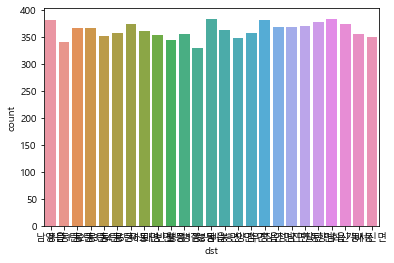

In [5]:
sns.countplot(sk_emd['dst'])

In [6]:
# 동수별 인구 이동수 출력
# print(sk_emd["org"].drop_duplicates())
dong_org_group = sk_emd["pop"].groupby(sk_emd["org"])
print(dong_org_group.sum().sort_values(ascending=False))
# dong_org_group.sum().plot(style='.-')

org
동탄2동    430871.46
동탄3동    349144.62
향남읍     323600.16
봉담읍     308383.44
동탄4동    301980.80
동탄6동    252096.52
진안동     234082.53
병점2동    177791.59
병점1동    168612.30
반월동     168043.18
동탄5동    164428.96
남양읍     131735.01
화산동     128132.41
동탄1동    122037.97
우정읍      84677.52
기배동      78332.80
팔탄면      69370.23
장안면      65360.38
마도면      46250.94
정남면      45624.30
송산면      37926.78
비봉면      34519.66
매송면      28359.08
서신면      23623.23
양감면      19851.05
Name: pop, dtype: float64


In [11]:
# 도착지별 출력
# print(sk_emd["dst"].drop_duplicates())
dong_dst_group = sk_emd["pop"].groupby(sk_emd["dst"])
print(dong_dst_group.sum().sort_values(ascending=False))
# dong_dst_group.sum().plot(style='.-')
# plt.plot(dong_dst_group.sum())

dst
동탄2동    374645.41
반월동     327906.56
동탄1동    260670.74
동탄3동    250128.22
동탄6동    246563.77
팔탄면     205209.63
봉담읍     201858.69
동탄5동    191843.01
진안동     187928.26
향남읍     177442.85
병점1동    144398.15
동탄4동    133742.01
병점2동    132244.64
정남면     130661.96
남양읍     130062.90
장안면     119781.24
화산동     119346.53
우정읍     111212.40
마도면      66878.88
양감면      64789.93
기배동      55565.92
비봉면      52002.70
송산면      48941.41
서신면      38755.56
매송면      22255.55
Name: pop, dtype: float64


## 시간별 날짜별 인구 수 분석


<BarContainer object of 4 artists>

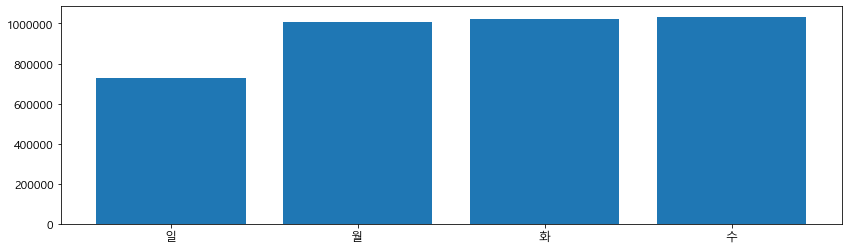

In [12]:
# 날짜가 4일 밖에없어서 평일 주말 비교 불가 ㅠ
time_list = list(set(sk_emd["std_ymd"]))
time_list.sort()
time_data = []
for i, time in enumerate(time_list):
    time_list[i] = str(time)
    time_data.append(sk_emd[sk_emd["std_ymd"] == time]["pop"].sum())
time_list = ["일","월","화","수"]
plt.bar(time_list, time_data)
# 주말보다는 역시 평일이 많은듯

<BarContainer object of 4 artists>

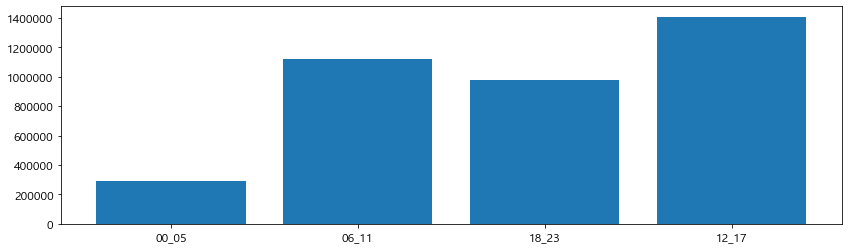

In [13]:
time_list = list(set(sk_emd["tm_trm"]))
time_data = []
for time in time_list:
    time_data.append(sk_emd[sk_emd["tm_trm"] == time]["pop"].sum())
plt.bar(time_list, time_data)

## 시간대별 pop

tm_trm
12_17    1407725.50
06_11    1118198.75
18_23     977335.84
00_05     291576.83
Name: pop, dtype: float64


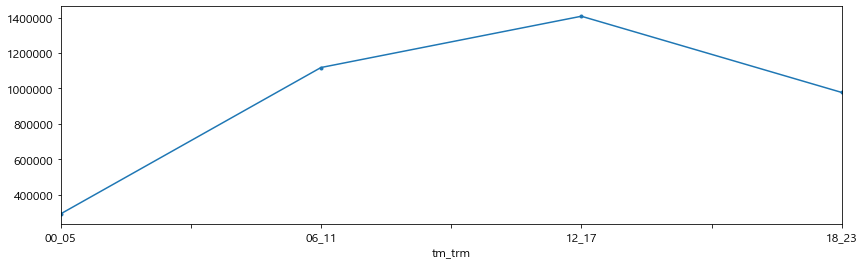

In [14]:
# 출근시간대보다 퇴근시간 때가 대중교통 이용수가 많음 
time_org_group = sk_emd["pop"].groupby(sk_emd["tm_trm"])
print(time_org_group.sum().sort_values(ascending=False))
time_org_group.sum().plot(style='.-')

# TripChain

In [7]:
tripchain = pd.read_csv("./PJT001_TripChain.csv")

In [8]:
tripchain.head()

,암호화카드번호||','||트랜잭션ID||','||환승횟수||','||교통카드발행사ID||','||총이용객수||','||사용자구분||','||교통수단CD1||','||교통수단CD2||','||교통수단CD3||','||교통수단CD4||',...,'||하차역ID1||','||하차역ID2||','||하차역ID3||','||하차역ID4||','||하차역ID5||','||최초승차역ID||','||최종하차역ID||','||총이용금액||','||수집건수||','||트립체인완료코드
0,900079696430,56,2,9000923,1,1,500.0,500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116708.0,1350,2,;
1,900079697651,5,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4117269.0,1250,1,;
2,900079698254,32,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4107936.0,1550,1,;
3,900079699257,80,1,9000923,1,1,500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116717.0,1250,1,;
4,900079701419,64,1,9000923,1,1,530.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4116848.0,2050,1,;


In [9]:
tripchain.columns

Index(['암호화카드번호||'', ''||트랜잭션ID||'', ''||환승횟수||'', ''||교통카드발행사ID||'',
       ''||총이용객수||'', ''||사용자구분||'', ''||교통수단CD1||'', ''||교통수단CD2||'',
       ''||교통수단CD3||'', ''||교통수단CD4||'', ''||교통수단CD5||'', ''||버스노선ID1||'',
       ''||버스노선ID2||'', ''||버스노선ID3||'', ''||버스노선ID4||'', ''||버스노선ID5||'',
       ''||차량ID1||'', ''||차량ID2||'', ''||차량ID3||'', ''||차량ID4||'',
       ''||차량ID5||'', ''||총통행거리||'', ''||총탑승시간||'', ''||총소요시간||'',
       ''||승차일시1||'', ''||승차일시2||'', ''||승차일시3||'', ''||승차일시4||'',
       ''||승차일시5||'', ''||하차일시1||'', ''||하차일시2||'', ''||하차일시3||'',
       ''||하차일시4||'', ''||하차일시5||'', ''||최초승차일시||'', ''||최종하차일시||'',
       ''||승차역ID1||'', ''||승차역ID2||'', ''||승차역ID3||'', ''||승차역ID4||'',
       ''||승차역ID5||'', ''||하차역ID1||'', ''||하차역ID2||'', ''||하차역ID3||'',
       ''||하차역ID4||'', ''||하차역ID5||'', ''||최초승차역ID||'', ''||최종하차역ID||'',
       ''||총이용금액||'', ''||수집건수||'', ''||트립체인완료코드'],
      dtype='object')

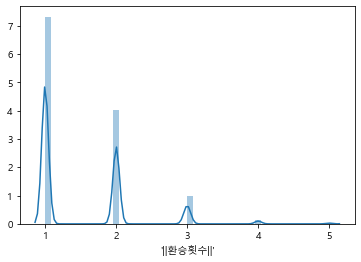

In [10]:
#histogram
sns.distplot(tripchain["'||환승횟수||'"])

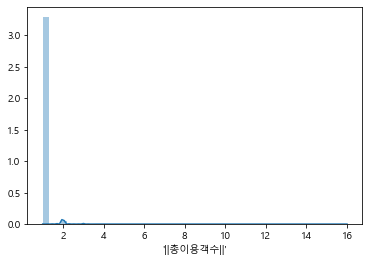

In [11]:
#histogram
sns.distplot(tripchain["'||총이용객수||'"])

## 환승 정보 

In [12]:
# 환승자 예시  : 하차역정보는 없음 ;;; 데이터 별로
target_columns = ["'||승차일시1||'","'||승차일시2||'","'||승차일시3||'","'||하차일시1||'","'||하차일시2||'","'||하차일시3||'"
                 ,"'||승차역ID1||'", "'||승차역ID2||'", "'||승차역ID3||'", "'||하차역ID1||'", "'||하차역ID2||'", "'||하차역ID3||'"]
# tripchain[tripchain["암호화카드번호||'"].isin([900079699257])]
tripchain[tripchain["암호화카드번호||'"].isin([900079699257])][target_columns]

,'||승차일시1||','||승차일시2||','||승차일시3||','||하차일시1||','||하차일시2||','||하차일시3||','||승차역ID1||','||승차역ID2||','||승차역ID3||','||하차역ID1||','||하차역ID2||','||하차역ID3||'
3,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4108130.0,NaN,NaN,NaN,NaN,NaN
454870,2.018070e+13,2.018070e+13,NaN,2.018070e+13,2.018070e+13,NaN,4116882.0,4108071.0,NaN,NaN,NaN,NaN
840424,2.018070e+13,2.018070e+13,2.018070e+13,2.018070e+13,2.018070e+13,2.018070e+13,4116882.0,4108071.0,4108130.0,NaN,NaN,NaN


In [13]:
# 환승으로 보이나 환승정보가 없는 데이터
# 환승자 정보 없지만 승차일시 1이 동일한 예시 -> 아마 환승?
# tripchain[tripchain["암호화카드번호||'"].isin([900079701419])]
tripchain[tripchain["암호화카드번호||'"].isin([900079701419])][target_columns]

,'||승차일시1||','||승차일시2||','||승차일시3||','||하차일시1||','||하차일시2||','||하차일시3||','||승차역ID1||','||승차역ID2||','||승차역ID3||','||하차역ID1||','||하차역ID2||','||하차역ID3||'
4,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4100122.0,NaN,NaN,NaN,NaN,NaN
5,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4100098.0,NaN,NaN,NaN,NaN,NaN
454876,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4100122.0,NaN,NaN,NaN,NaN,NaN
840429,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4100122.0,NaN,NaN,NaN,NaN,NaN
840430,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4100098.0,NaN,NaN,NaN,NaN,NaN


In [14]:
# tripchain[tripchain["암호화카드번호||'"].isin([900079696430])]
tripchain[tripchain["암호화카드번호||'"].isin([900079696430])][target_columns]

,'||승차일시1||','||승차일시2||','||승차일시3||','||하차일시1||','||하차일시2||','||하차일시3||','||승차역ID1||','||승차역ID2||','||승차역ID3||','||하차역ID1||','||하차역ID2||','||하차역ID3||'
0,2.018070e+13,2.018070e+13,NaN,2.018070e+13,2.018070e+13,NaN,4116828.0,4150144.0,NaN,NaN,NaN,NaN
539617,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4116807.0,NaN,NaN,NaN,NaN,NaN
539618,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4150159.0,NaN,NaN,NaN,NaN,NaN
840415,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4116828.0,NaN,NaN,NaN,NaN,NaN
840416,2.018070e+13,NaN,NaN,2.018070e+13,NaN,NaN,4150159.0,NaN,NaN,NaN,NaN,NaN


## 비어있는 컬럼 비율보기

거의 전체가 비어있는 컬럼이 여러개 <br>
반이상이 비어있는 컬럼이 절반이상 ;; 

In [15]:
print("전체 수 : ", len(tripchain))
data = tripchain.isna().sum()
print(data.sort_values(ascending=False))

# list(my_dataframe.columns.values)

전체 수 :  1048575
'||최초승차역ID||'      1048575
'||하차역ID3||'       1048575
'||하차역ID2||'       1048575
'||하차역ID1||'       1048575
'||승차역ID5||'       1048575
'||승차역ID4||'       1048575
'||버스노선ID5||'      1045668
'||하차역ID5||'       1045322
'||하차일시5||'        1045322
'||차량ID5||'        1045309
'||교통수단CD5||'      1045309
'||승차일시5||'        1045309
'||버스노선ID4||'      1034162
'||하차역ID4||'       1033038
'||하차일시4||'        1033038
'||승차일시4||'        1032934
'||차량ID4||'        1032934
'||교통수단CD4||'      1032934
'||버스노선ID3||'       958733
'||하차일시3||'         950797
'||승차역ID3||'        950179
'||교통수단CD3||'       950179
'||승차일시3||'         950179
'||차량ID3||'         950179
'||버스노선ID2||'       711144
'||하차일시2||'         615926
'||교통수단CD2||'       613273
'||차량ID2||'         613273
'||승차일시2||'         613273
'||승차역ID2||'        613273
'||버스노선ID1||'        65601
'||최종하차역ID||'        15176
'||하차일시1||'          12118
'||교통수단CD1||'           34
'||승차일시1||'             34
'||차량ID1||'             34
'||승차역ID1||'

## 비어있는 데이터가 절반 이상인 컬럼 버리기 

In [16]:
not_remove_list = list(data[data < len(tripchain)/2].keys())
new_t = tripchain[not_remove_list]

## 반복 이동자 추출해 보기
### 출발지와 도착지가 반되가 되는 경우 추출하기
전체 카드 사용기록과  실 사용자 수 비교

In [17]:
print("전체 카드 기록 수 " , len(new_t))
card_id = list(set(new_t["암호화카드번호||'"]))
real_number = len(card_id)
print("실 사용자 수 " ,real_number)

전체 카드 기록 수  1048575
실 사용자 수  498764


1. 승차역과 최종하차역이 같은 번호가 나온 경우 <br>
-> 시간 오래걸림

In [18]:
roop_card_list = []
grouped = new_t.groupby("암호화카드번호||'")
for i,(card_id, group) in enumerate(grouped):
    if len(group) <= 1:
        continue
    if len(set(group["'||승차역ID1||'"]) & set(group["'||최종하차역ID||'"])) != 0:
        roop_card_list.append(card_id)
        if len(roop_card_list) % 5000 == 0:
            print("반복 이동자 리스트 추가중 : ",len(roop_card_list))
            print("전체 진행 정도 : ", i/float(real_number))
len(roop_card_list)

반복 이동자 리스트 추가중 :  5000
전체 진행 정도 :  0.12064824245534962
반복 이동자 리스트 추가중 :  10000
전체 진행 정도 :  0.23451371791067518
반복 이동자 리스트 추가중 :  15000
전체 진행 정도 :  0.3447261630751217
반복 이동자 리스트 추가중 :  20000
전체 진행 정도 :  0.4586177029617214
반복 이동자 리스트 추가중 :  25000
전체 진행 정도 :  0.5684391816570562
반복 이동자 리스트 추가중 :  30000
전체 진행 정도 :  0.6784030122462728
반복 이동자 리스트 추가중 :  35000
전체 진행 정도 :  0.7826045985676593
반복 이동자 리스트 추가중 :  40000
전체 진행 정도 :  0.883796745555012
반복 이동자 리스트 추가중 :  45000
전체 진행 정도 :  0.9894338805527263


45333

- 구하는 시간이 오래걸려 파일로 출력 나중에는 파일을 읽어서 가져오기
#### 생각보다 많네?

In [20]:
print("반복 이동자는 전체 이용자 수의 ", (len(roop_card_list)*100)/real_number , "%")
#
with open("roop_card_list.txt","w",encoding="utf-8") as w:
    for card in roop_card_list:
        w.write("{}\n".format(card))
    w.close()

반복 이동자는 전체 이용자 수의  9.089068176532388 %


2. 같은 역에서 같은 도착지로 계속해서 이동하는 경우
-> 황승 제거 및 전처리 필요

In [26]:
start_card_list = []
grouped = new_t.groupby("암호화카드번호||'")
for i,(card_id, group) in enumerate(grouped):
    print(card_id)
    print("====================")
    print(group)
    break

100000006098
          암호화카드번호||'  '||트랜잭션ID||'  '||환승횟수||'  '||교통카드발행사ID||'  '||총이용객수||'  \
322171  100000006098             9           1          1000200            1   
322172  100000006098            10           1          1000200            1   
689006  100000006098            11           1          1000200            1   
689007  100000006098            12           1          1000200            1   

        '||사용자구분||'  '||교통수단CD1||'  '||버스노선ID1||'  '||차량ID1||'  '||총통행거리||'  \
322171            1          500.0     41036113.0  141705623.0         6060   
322172            1          500.0     41036113.0  141705627.0         5940   
689006            1          500.0     41036113.0  141705624.0         5580   
689007            1          500.0     41036113.0  141705627.0         5580   

        ...  '||총소요시간||'   '||승차일시1||'   '||하차일시1||'    '||최초승차일시||'  \
322171  ...           16  2.018070e+13  2.018070e+13  20180702063838   
322172  ...           26  2.018070e+13  2.0180

#  h_100m_cell_flow.geojson

설치 필요 -> anaoncda 에서 설치시 <br>
명령어 : conda install geopandas <br>
설치 용량이 좀 크다..

In [19]:
import geopandas as gpd

ModuleNotFoundError: No module named 'geoband'

In [17]:
df = gpd.read_file('./PJT001_h_100m_cell_pop.geojson.txt')

In [52]:
records.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [34]:
records["type"]

'FeatureCollection'

In [35]:
records["name"]

'h_100m_cell_pop'

In [36]:
records["crs"]

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}

In [61]:
# records["features"]

In [ ]:
# len(records["features"])